# Predicting Employee Churn in Python

# # Analyze employee churn. Find out why employees are leaving the company, and learn to predict who will leave the company.

# Exploratory Analysis

Step 1: Import relevant libraries: Import all the relevant python libraries for building supervised machine learning algorithms.

In [1]:
#Standard libraries for data analysis:    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

Step 2: Import the dataset: Let’s load the input dataset into the python notebook in the current working directory.

In [2]:
churn=pd.read_csv(r"E:\data set\HR_employee_churn.csv" , parse_dates=True)
churn.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
churn.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [4]:
churn.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


This dataset has 14,999 samples, and 10 attributes(6 integer, 2 float, and 2 objects).
No variable column has null/missing values.

satisfaction_level: It is employee satisfaction point, which ranges from 0-1.

last_evaluation: It is evaluated performance by the employer, which also ranges from 0-1.

number_projects: How many numbers of projects assigned to an employee?

average_monthly_hours: How many average numbers of hours worked by an employee in a month? 

time_spent_company: time_spent_company means employee experience. The number of years spent by an employee in the company.

work_accident: Whether an employee has had a work accident or not.

promotion_last_5years: Whether an employee has had a promotion in the last 5 years or not.

Departments: Employee's working department/division.

Salary: Salary level of the employee such as low, medium and high.

left: Whether the employee has left the company or not


In [6]:
left = churn.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Employees who left the company had low satisfaction level, low promotion rate, low salary, and worked more compare to who stayed in the company.

In [7]:
churn.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Data Visualization

Employees Left
Let's check how many employees were left?

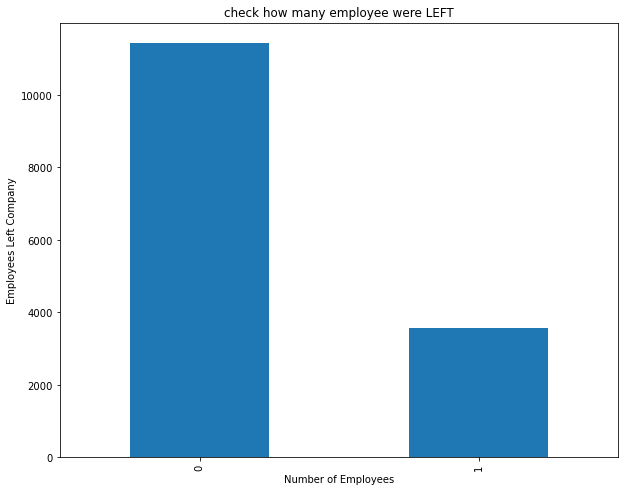

In [8]:
left_count=left.count()
plt.figure(figsize=(10,8))
#plt.bar(left_count.index.values,left_count['satisfaction_level'])
left_count["satisfaction_level"].plot(kind='bar')
plt.title("check how many employee were LEFT")
plt.xlabel('Number of Employees')
plt.ylabel('Employees Left Company') 
plt.show()

In [9]:
left_count

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


In [10]:
churn.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

Here, you can see out of 15,000 approx 3,571 were left, and 11,428 stayed. The no of employee left is 23 % of the total employment.

Number of Projects: number of employees deployed on How many projects?

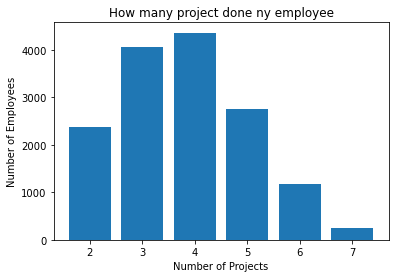

In [11]:
num_projects=churn.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.title("How many project done ny employee")
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee is doing the project from 3-5.

Time Spent in Company:number of employees have based on how much experience?

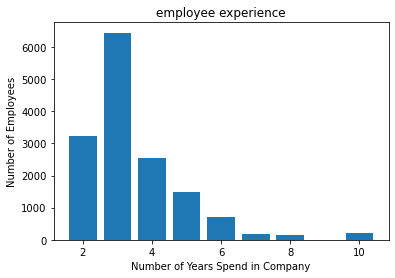

In [12]:
time_spent=churn.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.title("employee experience")
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.

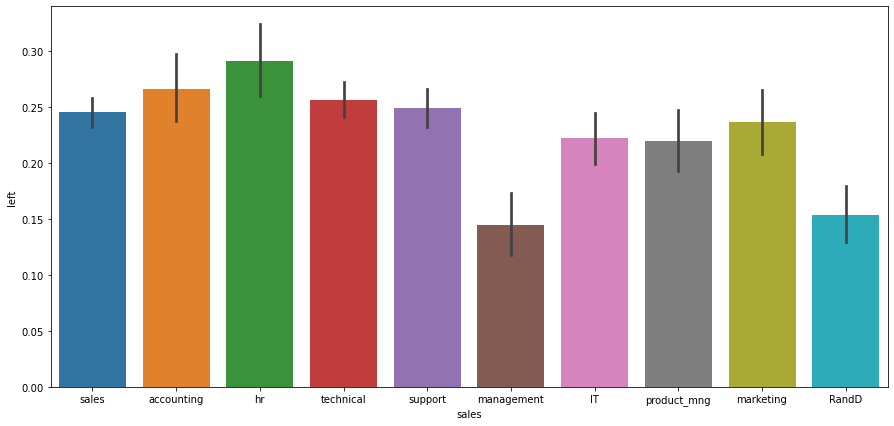

In [13]:
###Which Department employess left the company most

fig = plt.figure(figsize=(15,7))
sn.barplot(x='sales',y='left',data=churn)
plt.show()

Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.

# Subplots using Seaborn

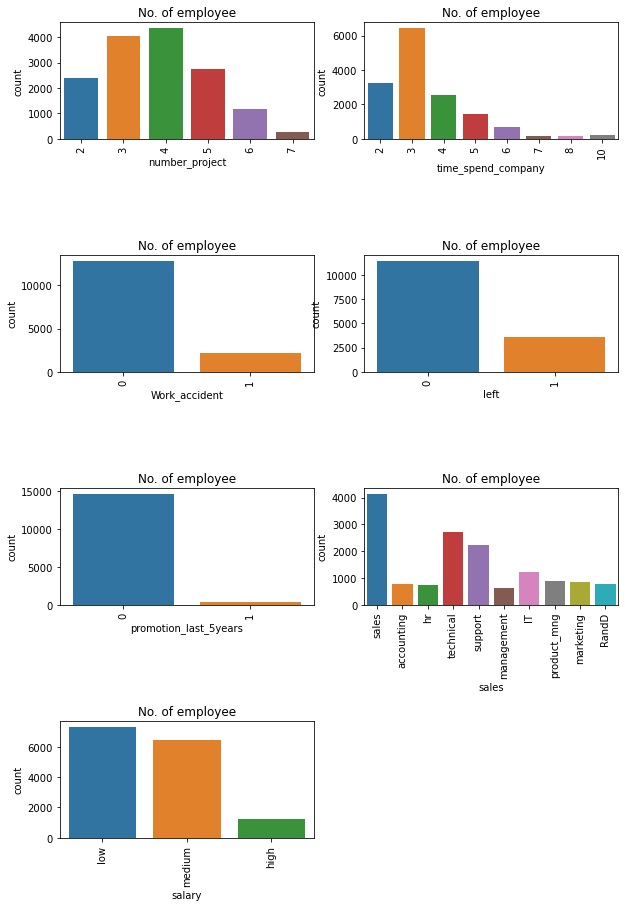

In [14]:
import seaborn as sns

features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','sales','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j, data=churn)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

Most of the employee is doing the project from 3-5.

There is a huge drop between 3 years and 4 years experienced employee.

The no of employee left is 23 % of the total employment.

A decidedly less number of employee get the promotion in the last 5 year.

The sales department is having maximum no.of employee followed by technical and support
Most of the employees are getting salary either medium or low.

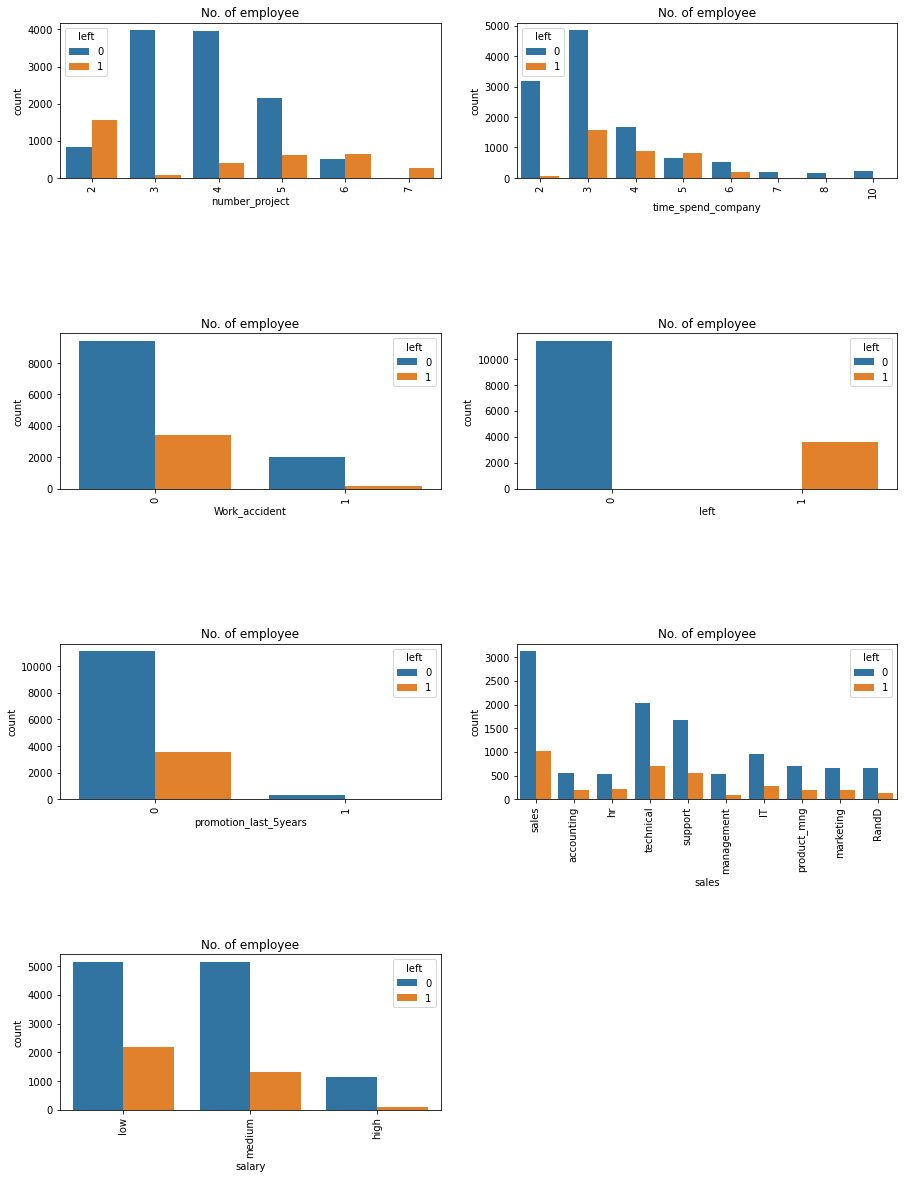

In [15]:
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = churn, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

In [16]:
def categorical_colum_investigaton(col_name):

    f,ax = plt.subplots(1,3, figsize=(18,6))
    churn['salary'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True, cmap='Set3')
    ax[0].set_title(f'employee salary')
    
    churn['left'].value_counts().plot.bar(cmap='Set3',ax=ax[1])
    ax[1].set_title(f'employee left')
    
    
    churn['Work_accident'].value_counts().plot.bar(cmap='Set3',ax=ax[2])
    ax[2].set_title(f'employee Work_accident')
    
    

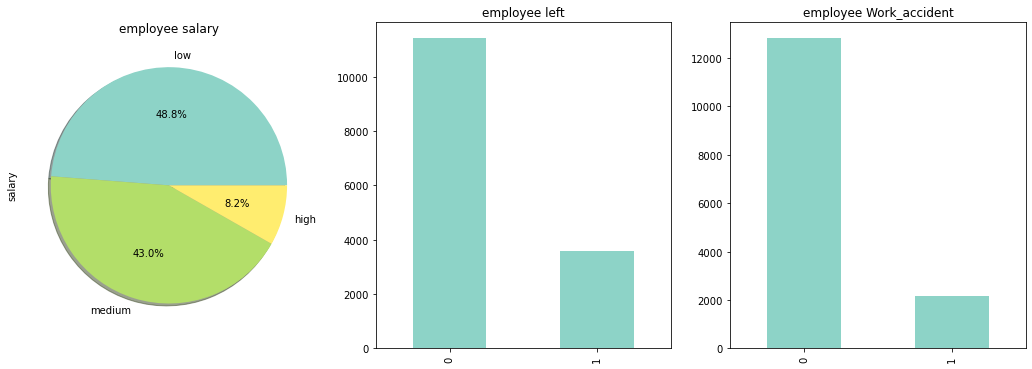

In [17]:
categorical_colum_investigaton('left')

# HEAT MAP :

<AxesSubplot:>

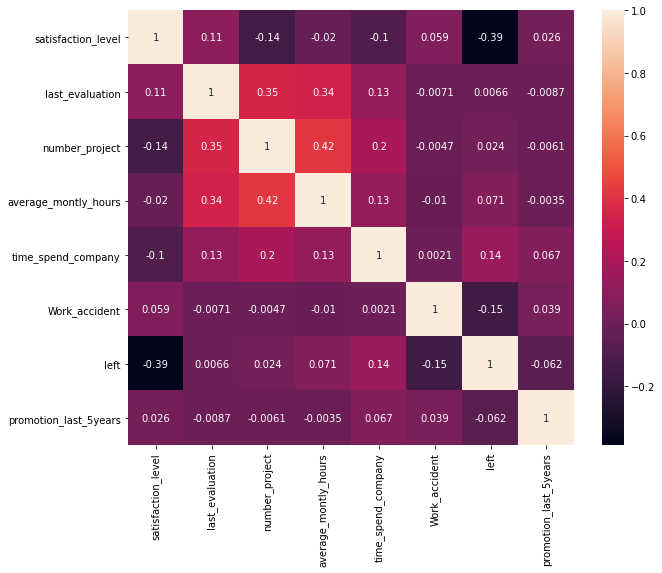

In [18]:

correlations = churn.corr()
f, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(correlations, annot = True)


<AxesSubplot:>

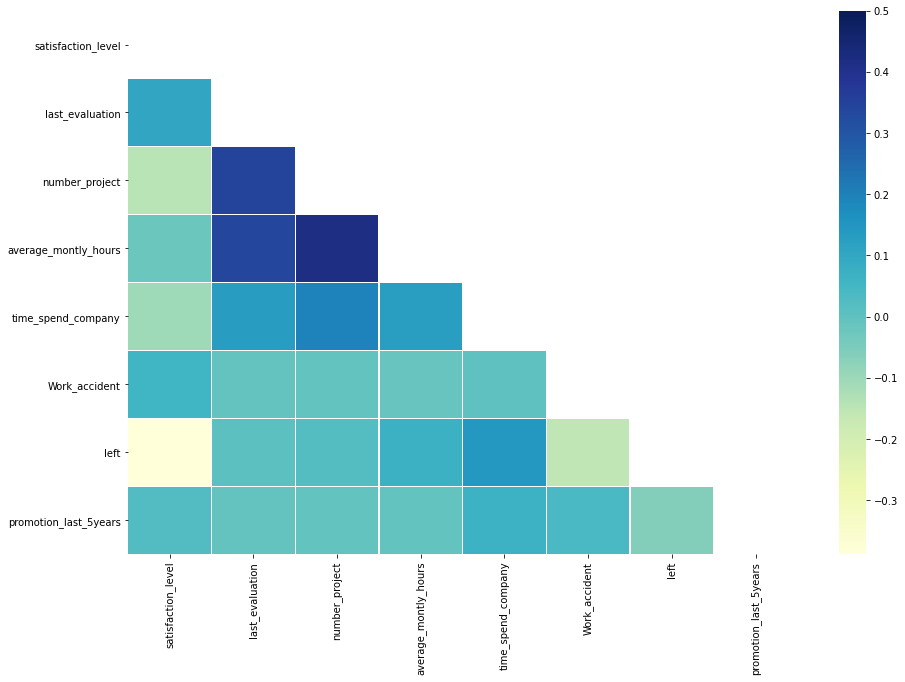

In [19]:
# Calculate correlations
corr = churn.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

Those employees who have the number of projects more than 5 were left the company.

The employee who had done 6 and 7 projects, left the company it seems to like that they were overloaded with work.

The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.

Those who promotion in last 5 years they didn't leave, i.e., all those left they didn't get the promotion in the previous 5 years.

Data Analysis and Visualization Summary:
    
    Promotions: Employees are far more likely to quit their job if they haven't received a promotion in the last 5 years.  
        
Time with Company: Here, The three-year mark looks like a time to be a crucial point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.
    
Number Of Projects: Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3-5 projects are less likely to leave the company. The employee with less and more number of projects are likely to leave.
    
Salary: Most of the employees that quit among the mid or low salary groups.
    

# Cluster Analysis:

In [20]:
#import module
from sklearn.cluster import KMeans

# Filter data
left_emp =  churn[['satisfaction_level', 'last_evaluation']][churn.left == 1]

# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

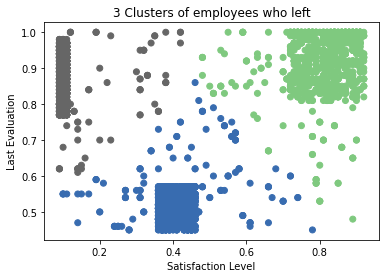

In [21]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_

# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners. 

Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.

Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.

# Building a Prediction Model

Pre-Processing Data

In [22]:
# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
churn['salary']=le.fit_transform(churn['salary'])
churn['sales']=le.fit_transform(churn['sales'])

Split Train and Test Set

In [23]:
#Spliting data into Feature and
X=churn[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary']]
y=churn['left']

In [24]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [25]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

In [26]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806


In [27]:
churn.shape

(14999, 10)

In [29]:
acc_results = []
names = []
models = []
auc_results = []


# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

# evaluate each model using cross-validation
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

E:\anaconda file\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\anaconda file\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\anaconda file\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
E:\anaconda file\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error 

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,99.16,0.35,99.04,0.31
4,Decision Tree Classifier,97.46,0.75,97.92,0.70
2,SVM,96.85,0.57,94.78,0.73
3,KNN,96.77,0.59,93.23,0.56
5,Gaussian NB,85.01,1.65,79.86,1.65
0,Logistic Regression,81.56,1.20,75.03,0.88


Classification Accuracy is the number of correct predictions made as a ratio of all predictions made.
It is the most common evaluation metric for classification problems. However, it is often misused as it is only really suitable when there are an equal number of observations in each class and all predictions and prediction errors are equally important. It is not the case in this project, so a different scoring metric may be more suitable

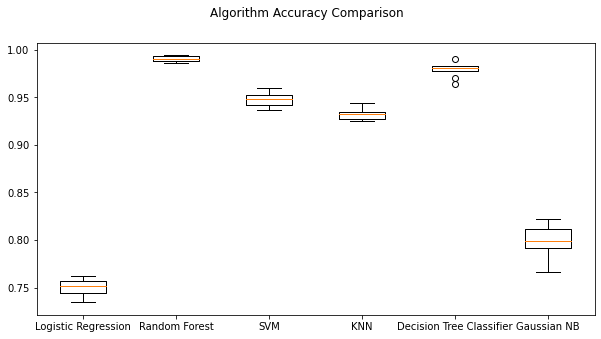

In [30]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.
The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

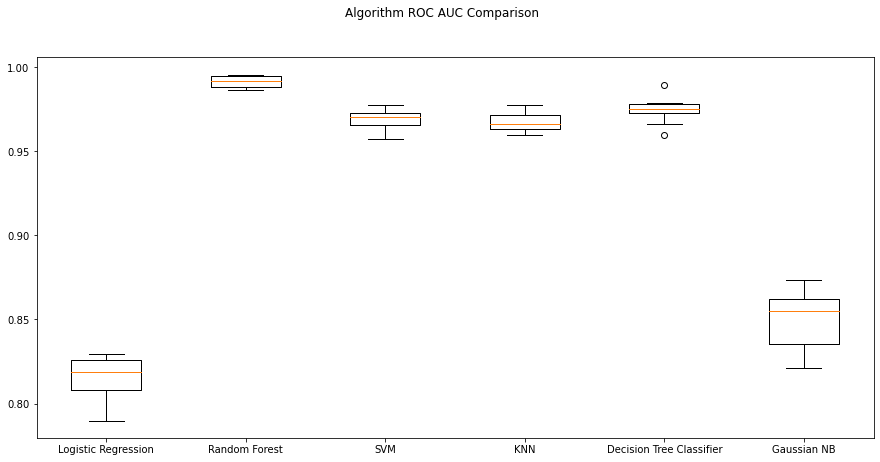

In [31]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

# Logistic Regression¶
Let's take a closer look at using the Logistic Regression algorithm. I'll be using 10 fold Cross-Validation to train our Logistic Regression Model and estimate its AUC score.

In [32]:

kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

E:\anaconda file\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


AUC score (STD): 0.82 (0.01)


In [33]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=0.020999999999999998, class_weight='balanced',
                   random_state=7, solver='liblinear')
best params: {'C': 0.020999999999999998}
best score: 0.8160589337060595


E:\anaconda file\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


# Evaluation

Text(0.5, 257.44, 'Predicted label')

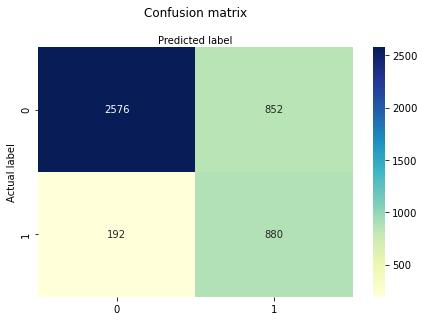

In [34]:
import seaborn as sns
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 76.80


The Confusion matrix is telling us that we have 231+47 correct predictions and 78+12 incorrect predictions. In other words, an accurac of 75.54%.

In [36]:

# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      3428
           1       0.51      0.82      0.63      1072

    accuracy                           0.77      4500
   macro avg       0.72      0.79      0.73      4500
weighted avg       0.83      0.77      0.78      4500



In [37]:

log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.819


# Random Forest Classifier¶
Let's take a closer look at using the Random Forest algorithm. I'll fine-tune the Random Forest algorithm's hyper-parameters by cross-validation against the AUC score

In [38]:
from sklearn.ensemble import RandomForestClassifier   
rf_clf=RandomForestClassifier()


In [39]:
rf_clf.fit(X_train,y_train)                              

RandomForestClassifier()

In [40]:
y_pred=rf_clf.predict(X_test)    

In [41]:
print(" Random forest model_accuracy : " ,accuracy_score(y_pred,y_test)*100)   

 Random forest model_accuracy :  98.75555555555555


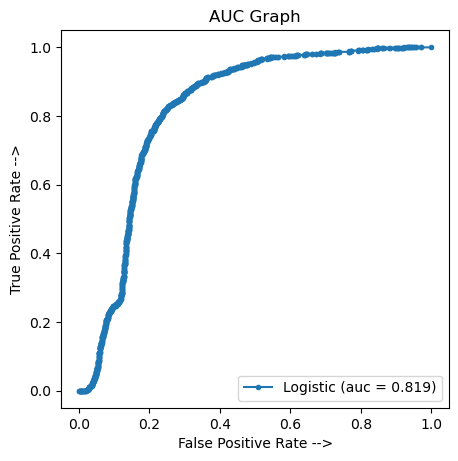

In [42]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
auc_logistic = auc(fpr, tpr)

#svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
#auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
#plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(fpr, tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title('AUC Graph')
plt.legend()

plt.show()

In [43]:
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175]
              }

In [44]:
grid_obj = GridSearchCV(rf_clf,param_grid=param_grid)
                        
grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

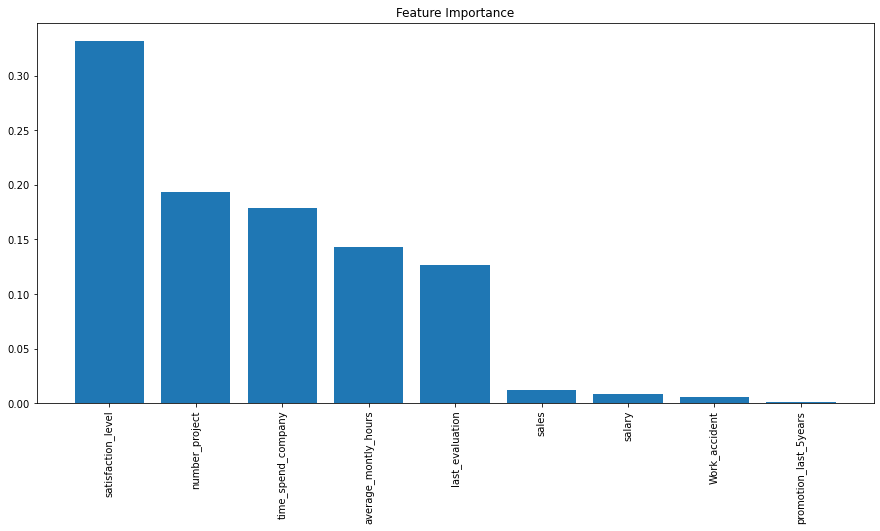

In [45]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() 

In [46]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.96      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [47]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.990


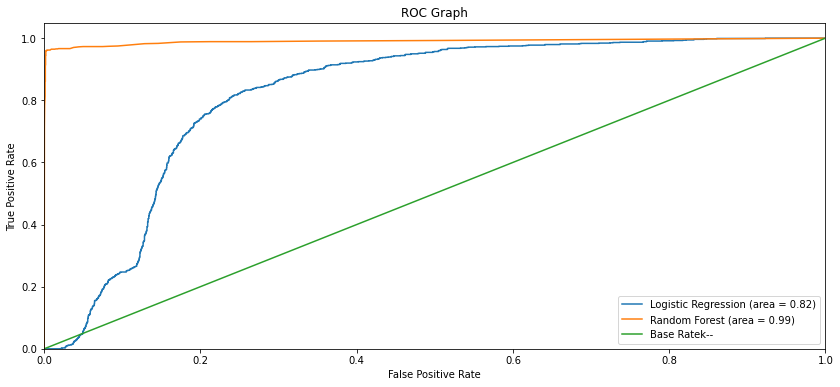

In [48]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

As shown below, the fine-tuned Logistic Regression model showed a higher AUC score compared to the Random Forest Classifier.

# select model & Matrics

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [50]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [52]:
models = [lr,knn,svm,nb,dt,rf]
scores= []
scoring = 'accuracy'
for  model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))
    print("accuracy of"+type(model).__name__ +"is",accuracy_score(y_test,y_pred))

E:\anaconda file\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy ofLogisticRegressionis 1.0
accuracy ofKNeighborsClassifieris 0.98
accuracy ofSVCis 1.0
accuracy ofGaussianNBis 0.96
accuracy ofDecisionTreeClassifieris 1.0
accuracy ofRandomForestClassifieris 0.98


In [53]:
results = pd.DataFrame({
    'models':['LogisticRegression','KNeighborsClassifieris ','SVC','GaussianNB','DecisionTreeClassifier','RandomForestClassifier']
    ,'accuracy':scores})
results = results.sort_values(by='accuracy',ascending=False)
print(results)

                    models  accuracy
0       LogisticRegression      1.00
2                      SVC      1.00
4   DecisionTreeClassifier      1.00
1  KNeighborsClassifieris       0.98
5   RandomForestClassifier      0.98
3               GaussianNB      0.96
